Consumers are asked to rate a company both before and after viewing a video on the company twice a day for a week. The data are displayed in table below.
Use an alpha of .05 to test to determine whether there is a significant increase in the ratings of the company after the one-week video treatment. Assume that differences in ratings are normally distributed in the population.

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import gdown

In [3]:
file_url = 'https://docs.google.com/uc?id=1VPOwYgABrqhwHNE8gE8AlhrIlxvu5Lyj'
gdown.download(file_url, 'file.xlsx', quiet=False)
df1 = pd.read_excel('file.xlsx',sheet_name = 'Video ratings',skiprows=13,usecols=['Subject', 'Before', 'After', 'Difference'], index_col= 'Subject')
df1

Downloading...
From: https://docs.google.com/uc?id=1VPOwYgABrqhwHNE8gE8AlhrIlxvu5Lyj
To: c:\Users\krish\OneDrive\Pictures\CS 8th sem\New folder\CSL530-STATISTICS-WITH-PYTHON\Project\file.xlsx
100%|██████████| 246k/246k [00:00<00:00, 622kB/s]


,Before,After,Difference
Subject,,,
1,32,39,7
2,11,15,4
3,21,35,14
4,17,13,-4
5,30,41,11
6,38,39,1
7,14,22,8


### Task 1: Calculate the mean and standard deviation

In [4]:
df2=pd.DataFrame(columns=df1.columns)
df2.loc["Mean"]= df1.mean()
df2.loc["Std Dev"] = df1.std()

df2

,Before,After,Difference
Mean,23.285714,29.142857,5.857143
Std Dev,10.160615,12.116498,6.094494


### Task 2: Determine the appropriate statistic to use

The appropriate statistic to use for this scenario would be a paired t-test, also known as a dependent t-test. This is because the data involves comparing ratings of the same individuals before and after a treatment (in this case, viewing a video on the company) over a period of time (one week), and the ratings are assumed to be normally distributed in the population.

A paired t-test is used when the same individuals are measured twice under different conditions, and it is ideal for situations where the data are paired or matched, such as pre-test and post-test measurements or repeated measures designs. In this case, the paired t-test would allow us to assess whether there is a statistically significant difference in the ratings of the company before and after the one-week video treatment. The alpha level of 0.05 would be used as the significance level to determine whether the observed difference in ratings is statistically significant or due to chance.

### Task 3: Calculate the 95% confidence intervals

In [7]:
lower, upper = stats.t.interval(confidence=0.95,df=6,loc=df1.mean(),scale=stats.sem(df1)) # stats.sem(df1) is equivalent to df1.std()/np.sqrt(7)

df2.loc["Lower_95"]=lower
df2.loc["Upper_95"]=upper
df2

,Before,After,Difference
Mean,23.285714,29.142857,5.857143
Std Dev,10.160615,12.116498,6.094494
Lower_95,13.888713,17.936965,0.220676
Upper_95,32.682716,40.348749,11.493610


### Task 4: Test if there is enough evidence to conclude that the ratings have increased significantly

> **Step 1: Define null and alternative hypotheses**

The null hypothesis states that the mean of video rating are the same, µA equals µB. The alternative hypothesis states that the mean of video rating, µA is not equal to µB.

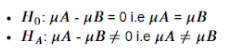

> **Step 2: Decide the significance level**

Here we select α = 0.05 and the population standard deviation is not known.

> **Step 3: Identify the test statistic**

* We have two samples and we do not know the population standard deviation.
* Sample sizes for samples are same.
* The sample is not a large sample, n < 30. So you use the t distribution and the test statistic for two sample unpaired test.

> **Step 4: Calculate the p - value and test statistic**

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations
have identical variances.

In [8]:
t_stats , p_value = stats.ttest_rel(df1["Before"], df1["After"])
print("T - statistic is : ", t_stats)
print("P Value is : ", p_value)

T - statistic is :  -2.542712059078773
P Value is :  0.04391998543533062


> **Step 5: Decide to reject or accept null hypothesis**

In [9]:
if p_value < 0.05:
    print("Reject null hypothesis. There is enough evidence to conclude that, on average, the ratings have increased significantly")
else:
    print("Fail to reject null hypothesis. There is not enough evidence to conclude that, on average, the ratings have increased significantly.")

Reject null hypothesis. There is enough evidence to conclude that, on average, the ratings have increased significantly


### Optional Task : Calculate the 90% and 99% confidence intervals

> **Decide the significance level**

Here we select α = 0.10 and the population standard deviation is not known.

In [10]:
lower, upper = stats.t.interval(confidence=0.90,df=6,loc=df1.mean(),scale=df1.std()/np.sqrt(7))

df2.loc["Lower_90"] = lower
df2.loc["Upper_90"] = upper

> **Decide the significance level**

Here we select α = 0.01 and the population standard deviation is not known.

In [11]:
lower, upper = stats.t.interval(confidence=0.99,df=6,loc=df1.mean(),scale=df1.std()/np.sqrt(7))

df2.loc["Lower_99"] = lower
df2.loc["Upper_99"] = upper

df2

,Before,After,Difference
Mean,23.285714,29.142857,5.857143
Std Dev,10.160615,12.116498,6.094494
Lower_95,13.888713,17.936965,0.220676
Upper_95,32.682716,40.348749,11.493610
Lower_90,15.823219,20.243857,1.381023
Upper_90,30.748210,38.041857,10.333263
Lower_99,9.047888,12.164298,-2.682926
Upper_99,37.523541,46.121416,14.397212
